In [114]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity , linear_kernel
import pickle as pkl

In [115]:
data = pd.read_csv("data.csv")
data_dup = pd.read_csv("data.csv")
data.head()

,APPLICATIONNUMBER,NAME,AGGREGATEMARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY
0,316999,J NITHYASREE,200,1,MBCV,1,CS,OC
1,251701,SREENITHI A,200,3,BC,1,CS,OC
2,340928,UMA SHWETHA P L,200,6,OC,1,EC,OC
3,258426,SUBHASRI SHREYA S L,200,7,BC,2006,CM,OC
4,243792,Sarathivasan s,200,8,BC,1,CS,OC


In [116]:
data.columns

Index(['APPLICATIONNUMBER', 'NAME', 'AGGREGATEMARK', 'RANK', 'COMMUNITY',
       'COLLEGE CODE', 'BRANCH CODE', 'ALLOTTED CATEGORY'],
      dtype='object')

In [117]:
data["COLLEGE CODE"].value_counts

<bound method IndexOpsMixin.value_counts of 0           1
1           1
2           1
3        2006
4           1
         ... 
10143    1309
10144    2722
10145    2718
10146    1113
10147    2006
Name: COLLEGE CODE, Length: 10148, dtype: int64>

In [118]:
data.describe()

,APPLICATIONNUMBER,COLLEGE CODE
count,10148.000000,10148.000000
mean,276188.026311,2013.396827
std,44339.663625,1466.736913
min,200004.000000,1.000000
25%,240293.750000,1211.000000
50%,277459.000000,2006.000000
75%,309127.500000,2712.000000
max,374890.000000,5988.000000


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148 entries, 0 to 10147
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   APPLICATIONNUMBER  10148 non-null  int64 
 1   NAME               10148 non-null  object
 2   AGGREGATEMARK      10148 non-null  object
 3   RANK               10148 non-null  object
 4   COMMUNITY          10148 non-null  object
 5   COLLEGE CODE       10148 non-null  int64 
 6   BRANCH CODE        10148 non-null  object
 7   ALLOTTED CATEGORY  10148 non-null  object
dtypes: int64(2), object(6)
memory usage: 634.4+ KB


In [120]:
data = data[["AGGREGATEMARK" ,"COMMUNITY" ,   "BRANCH CODE" , "COLLEGE CODE" ]]

In [121]:
def convToint(x):

    if(isinstance(x,(int , float))): 
        return x
    
    while((not x.isnumeric()) and (not len(x)==0)):
        x = x[:-1] 
    
    if(x!=""):
        return x
    
    return 0

convToint("579.34")

def convToint(x):

    if(isinstance(x,(int , float))): 
        return x
    
    while((not isinstance(x,float)) and (not len(x)==0)):

        try:
            x = float(x)
        except:
            x = x[:-1]
    
    if(x!=""):
        return x
    
    return 0


In [122]:
cols_to_conv = [ "AGGREGATEMARK",  "COLLEGE CODE"]
for col in cols_to_conv:
    data[col] = data[col].apply(convToint)

data["AGGREGATEMARK"].value_counts().shape


(1751,)

In [123]:
from sklearn.preprocessing import LabelEncoder

comEnc = LabelEncoder()
braEnc = LabelEncoder()


data["COMMUNITY"] = comEnc.fit_transform(data["COMMUNITY"])
data["BRANCH CODE"] = braEnc.fit_transform(data["BRANCH CODE"])

comMappings = dict(zip(comEnc.classes_ , comEnc.transform(comEnc.classes_)))
braMappings = dict(zip(braEnc.classes_ , braEnc.transform(braEnc.classes_)))


comMappings , braMappings


({'BC': 0,
  'BCM': 1,
  'MBC': 2,
  'MBCDNC': 3,
  'MBCV': 4,
  'OC': 5,
  'SC': 6,
  'SCA': 7,
  'ST': 8},
 {'AD': 0,
  'AE': 1,
  'AG': 2,
  'AL': 3,
  'AM': 4,
  'AO': 5,
  'AP': 6,
  'AS': 7,
  'AT': 8,
  'AU': 9,
  'BM': 10,
  'BS': 11,
  'BT': 12,
  'BY': 13,
  'CB': 14,
  'CC': 15,
  'CD': 16,
  'CE': 17,
  'CF': 18,
  'CH': 19,
  'CJ': 20,
  'CL': 21,
  'CM': 22,
  'CN': 23,
  'CO': 24,
  'CR': 25,
  'CS': 26,
  'CT': 27,
  'CW': 28,
  'CY': 29,
  'EC': 30,
  'EE': 31,
  'EI': 32,
  'EM': 33,
  'ES': 34,
  'EY': 35,
  'FD': 36,
  'FS': 37,
  'FT': 38,
  'FY': 39,
  'GI': 40,
  'IB': 41,
  'IC': 42,
  'IE': 43,
  'IM': 44,
  'IS': 45,
  'IT': 46,
  'IY': 47,
  'LE': 48,
  'MA': 49,
  'MC': 50,
  'MD': 51,
  'ME': 52,
  'MF': 53,
  'MG': 54,
  'MI': 55,
  'MN': 56,
  'MR': 57,
  'MS': 58,
  'MT': 59,
  'MY': 60,
  'MZ': 61,
  'PA': 62,
  'PC': 63,
  'PH': 64,
  'PM': 65,
  'PN': 66,
  'PP': 67,
  'PR': 68,
  'PS': 69,
  'PT': 70,
  'RA': 71,
  'RM': 72,
  'RP': 73,
  'SC': 74,
 

In [124]:
for i in braEnc.classes_:

    print(f'<option  value="{i}"> ',end="")

<option  value="AD"> <option  value="AE"> <option  value="AG"> <option  value="AL"> <option  value="AM"> <option  value="AO"> <option  value="AP"> <option  value="AS"> <option  value="AT"> <option  value="AU"> <option  value="BM"> <option  value="BS"> <option  value="BT"> <option  value="BY"> <option  value="CB"> <option  value="CC"> <option  value="CD"> <option  value="CE"> <option  value="CF"> <option  value="CH"> <option  value="CJ"> <option  value="CL"> <option  value="CM"> <option  value="CN"> <option  value="CO"> <option  value="CR"> <option  value="CS"> <option  value="CT"> <option  value="CW"> <option  value="CY"> <option  value="EC"> <option  value="EE"> <option  value="EI"> <option  value="EM"> <option  value="ES"> <option  value="EY"> <option  value="FD"> <option  value="FS"> <option  value="FT"> <option  value="FY"> <option  value="GI"> <option  value="IB"> <option  value="IC"> <option  value="IE"> <option  value="IM"> <option  value="IS"> <option  value="IT"> <option  valu

<Axes: >

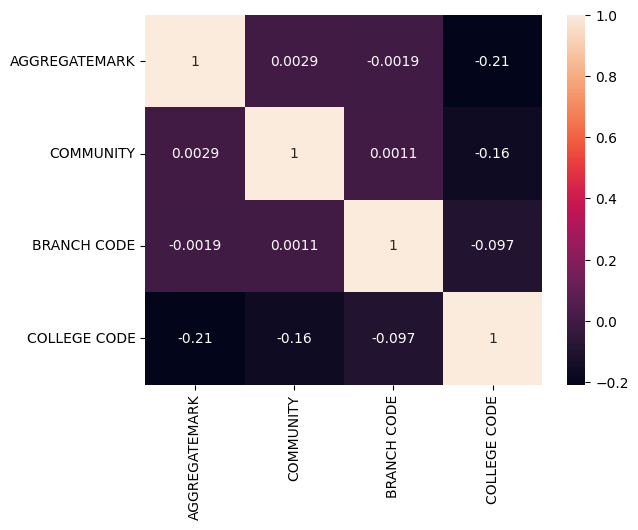

In [125]:
mat = data.corr()
sns.heatmap(mat,annot = True)

In [126]:
data.columns

Index(['AGGREGATEMARK', 'COMMUNITY', 'BRANCH CODE', 'COLLEGE CODE'], dtype='object')

In [127]:
features = data.drop(["COLLEGE CODE"], axis="columns")
colleges = data["COLLEGE CODE"]

In [128]:
data.shape

(10148, 4)

In [129]:
data = data.drop_duplicates(subset=['AGGREGATEMARK', 'COMMUNITY', 'BRANCH CODE', 'COLLEGE CODE'])
data.reset_index(inplace=True , drop=True)
data

,AGGREGATEMARK,COMMUNITY,BRANCH CODE,COLLEGE CODE
0,200.0,4,26,1
1,200.0,0,26,1
2,200.0,5,30,1
3,200.0,0,22,2006
4,200.0,2,26,1
...,...,...,...,...
8910,186.0,1,0,1113
8911,186.0,4,26,1309
8912,186.0,4,26,2722
8913,186.0,0,14,1113


In [130]:
clgDict = {}
set(data.loc[0,['AGGREGATEMARK', 'COMMUNITY', 'BRANCH CODE']].values)
def makeIndex(arr):

    clg = arr[-1]
    key = tuple(arr[:-1])

    if(key in clgDict):
        clgDict[key].append(clg)

    else:
        clgDict[key] = [clg]

In [131]:
for i in range(data.shape[0]):

    arr = data.iloc[i].values
    makeIndex(arr)

In [132]:
unique_combinations = features.drop_duplicates(subset=['AGGREGATEMARK', 'COMMUNITY', 'BRANCH CODE'])
unique_combinations.reset_index(drop=True,inplace=True)
indices = unique_combinations.index
unique_features = unique_combinations.set_index(['AGGREGATEMARK', 'COMMUNITY', 'BRANCH CODE'])
unique_features["indices"] = indices
unique_features.loc[(200.0, comMappings["BC"], braMappings["CS"])]

indices    1
Name: (200.0, 0, 26), dtype: int64

In [133]:
unique_combinations.reset_index()

,index,AGGREGATEMARK,COMMUNITY,BRANCH CODE
0,0,200.0,4,26
1,1,200.0,0,26
2,2,200.0,5,30
3,3,200.0,0,22
4,4,200.0,2,26
...,...,...,...,...
7338,7338,186.0,0,36
7339,7339,186.0,6,77
7340,7340,186.0,1,0
7341,7341,186.0,4,26


In [134]:
cossim = linear_kernel(unique_combinations , unique_combinations)

In [135]:
availKeys = list(clgDict.keys())

In [136]:
def getKey(arr):
    
    m , c , b = arr
    keys =  unique_combinations[(unique_combinations["COMMUNITY"] == c) &
                    (unique_combinations["BRANCH CODE"] == b) & 
                    (unique_combinations["AGGREGATEMARK"] <= m)][["AGGREGATEMARK" ,"COMMUNITY" , "BRANCH CODE"]].values
    
    if(len(keys) > 0):
        return tuple(keys[0])
    return (200.0 ,4, 26)

In [137]:
def getSimilars(arr , cos_sim = cossim):

    arr = (float(arr[0]) , arr[1] , arr[2])

    if(arr not in availKeys):
        arr = getKey(arr)
    
    index = unique_features.loc[tuple(arr)]["indices"]

    similars = list(enumerate(cos_sim[index]))


    similars = sorted(similars , key = lambda x :  x[1] , reverse = True)

    similars = [i for i,j in similars]

    similar_marks = unique_combinations.iloc[similars]


    return similar_marks[ (similar_marks["COMMUNITY"] == arr[1]) & (similar_marks["BRANCH CODE"] == arr[2])]
    
similars  = getSimilars([200.0, comMappings["SC"], braMappings["CS"]])
similars


,AGGREGATEMARK,COMMUNITY,BRANCH CODE
41,198.495,6,26
74,198.000,6,26
118,197.640,6,26
156,197.320,6,26
187,197.100,6,26
...,...,...,...
6796,186.500,6,26
6903,186.435,6,26
7019,186.300,6,26
7162,186.130,6,26


In [138]:
def getColleges(arr , cos_sim=cossim):


    similar_marks = getSimilars(arr, cos_sim)

    arr = (float(arr[0]) , arr[1] , arr[2])

    unique_clgs = list()

    for i in range(len(similar_marks)):
        
        index = similar_marks.iloc[i].values

        index = tuple(index)
            
        for clg in clgDict[index] :
            if clg not in unique_clgs:
                unique_clgs.append(clg)
    
    return unique_clgs[:10]
            

getColleges([200.0, comMappings["BC"], braMappings["CS"]])


[1.0, 5008.0, 4.0, 1315.0, 2007.0, 2025.0, 1211.0, 2005.0, 2377.0, 2607.0]

In [139]:
# Savin the necessary data for prediction in server

pickleData = dict()

pickleData["unique_combinations"] = unique_combinations
pickleData["cossim"] = cossim
pickleData["unique_features"] = unique_features
pickleData["clgDict"] = clgDict
pickleData["comMappings"] = comMappings
pickleData["braMappings"] = braMappings
pickleData["availKeys"] = availKeys

with open("pickleData" , "wb") as f:
    pkl.dump(pickleData , f)

In [140]:
cossim[unique_features.loc[(191.78, 3.0, 5.0)]["indices"]]

array([38498.  , 38486.  , 38521.  , ..., 35674.08, 35813.08, 36016.08])

In [143]:
id = unique_combinations[(unique_combinations["COMMUNITY"] == 3) &
         (unique_combinations["BRANCH CODE"] == 5) ][["AGGREGATEMARK" ,"COMMUNITY" , "BRANCH CODE"]].values[0]

In [145]:
clgDict[tuple(id)]

[1316.0]